**Problem statement can be found on this link-** https://datahack.analyticsvidhya.com/contest/job-a-thon-2/?utm_source=Blog&utm_medium=popup#LeaderBoard

In [ ]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load data from file to dataframe

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#keeping copy of original dataframes for future

test_orig = test.copy()
train_orig = train.copy()

In [ ]:
#data preview

train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
#check for missing values
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

*We don't see any missing values columns except,* **Credit Product** which has 29325 missing values

In [ ]:
#Similarly lets check missing values in test dataset
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [ ]:
train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


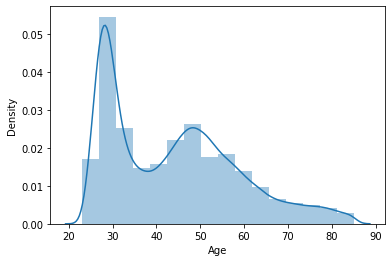

In [ ]:
#let check the distribution of age columns

sns.distplot(train['Age'],hist=True,bins=16)

Highest number of customers being in the age group of 25-30

In [ ]:
bins = [i for i in range(15,100,5)]
train['age_group'] = pd.cut(train['Age'],bins=bins)
train.drop(['Age'],axis=1,inplace=True)

In [ ]:
#Similarly for test dataset
test['age_group'] = pd.cut(test['Age'],bins=bins)
test.drop(['Age'],axis=1,inplace=True)

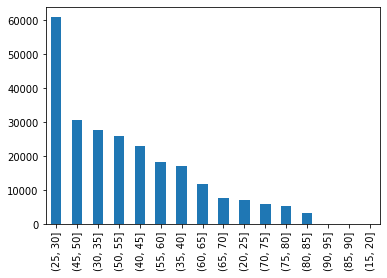

In [ ]:
train['age_group'].value_counts().plot.bar()

In [ ]:
#similarly, lets replace Yes/No in Credit Product and Is Active column
train['Credit_Product'].replace(['Yes','No'],[1,0],inplace=True)
train['Is_Active'].replace(['Yes','No'],[1,0],inplace=True)

In [ ]:
#same for Test set
test['Credit_Product'].replace(['Yes','No'],[1,0],inplace=True)
test['Is_Active'].replace(['Yes','No'],[1,0],inplace=True)

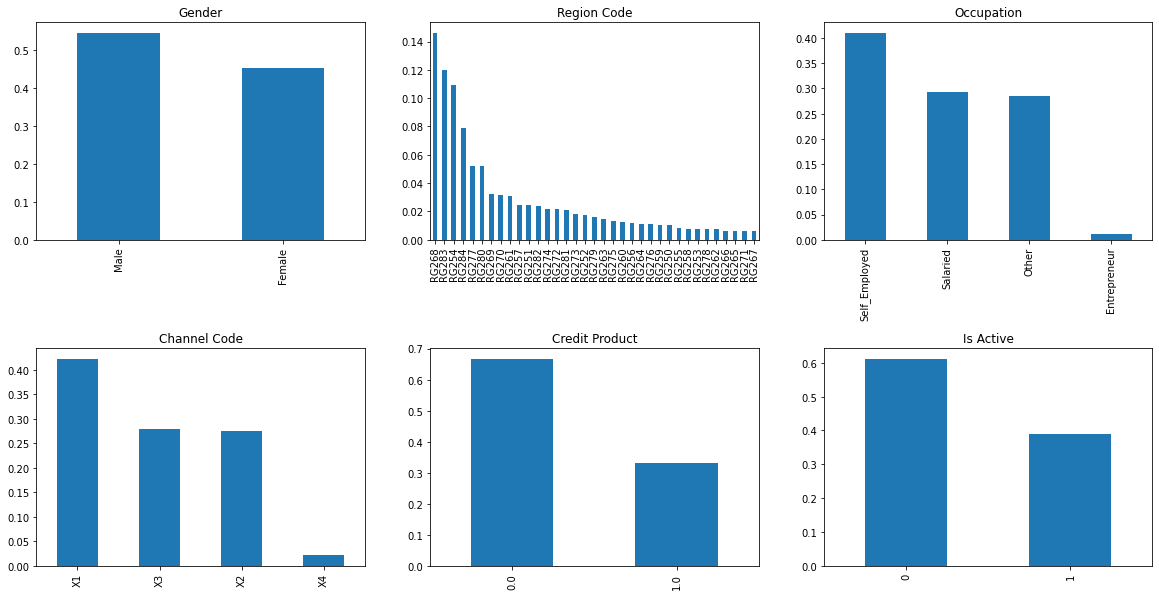

In [ ]:
#lets check the column distribution for all categorical columns
plt.figure(1)
plt.subplot(231)
plt.subplots_adjust(hspace=0.5)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(232)
train['Region_Code'].value_counts(normalize=True).plot.bar(title='Region Code')
plt.subplot(233)
train['Occupation'].value_counts(normalize=True).plot.bar(title='Occupation')
plt.subplot(234)
train['Channel_Code'].value_counts(normalize=True).plot.bar(title='Channel Code')
plt.subplot(235)
train['Credit_Product'].value_counts(normalize=True).plot.bar(title='Credit Product')
plt.subplot(236)
train['Is_Active'].value_counts(normalize=True).plot.bar(title='Is Active')

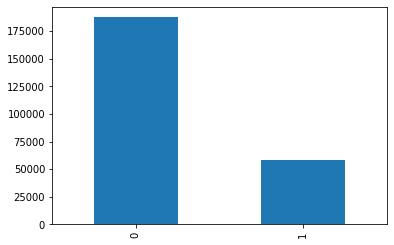

In [ ]:
#checking the independent column distribution as well

train['Is_Lead'].value_counts(normalize=False).plot.bar()

Data is highly imbalance

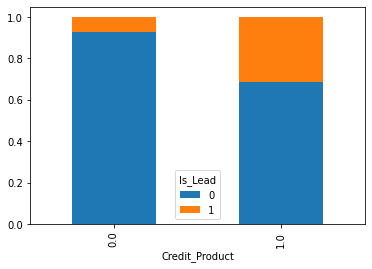

In [ ]:
#lets check the relation between Credit Product and Is_lead column

crd_prd = pd.crosstab(train['Credit_Product'],train['Is_Lead'])
crd_prd.div(crd_prd.sum(1).astype(float),axis=0).plot.bar(stacked=True)

Around 70% of customers does not have any Credit product. At the same time, it looks like people who already has any credit product, are more interested in getting a credit card

In [ ]:
#lets drop the null values
#train.dropna(inplace=True)
#dropping null values is resulting in loss of 50% of yes values, in already imbalanced data
#so dropping null values is not an option

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


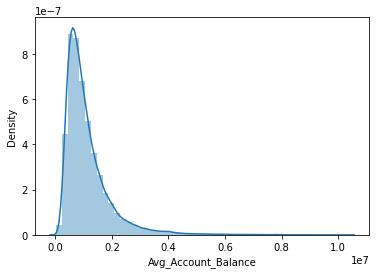

In [ ]:
#lets check the value distribution for Average Account balance column
sns.distplot(train['Avg_Account_Balance'],hist=True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd6747d06d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd6747d4650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6747db690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6747db150>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd6747d0b90>,
  <matplotlib.lines.Line2D at 0x7fd6747d4110>]}

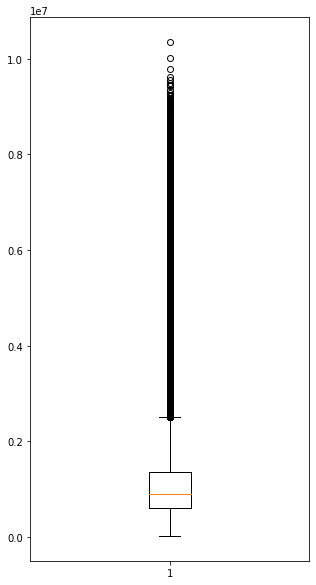

In [ ]:
#lets check for outlines in Average Account Balance Column
plt.figure(figsize=(5,10))
plt.boxplot(train['Avg_Account_Balance'])

Average Account Balance has so many outliers


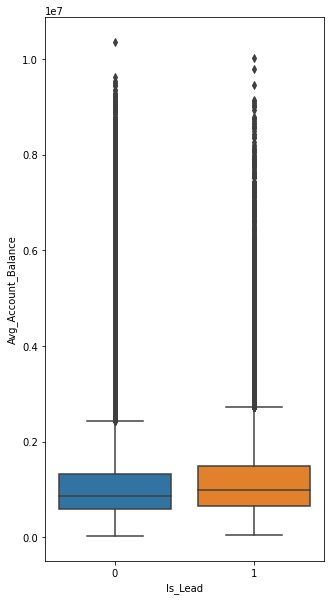

In [ ]:
plt.figure(figsize=(5,10))
sns.boxplot(y=train['Avg_Account_Balance'],x=train['Is_Lead'])

Since presence of outliers is almost same for both case (0/1), we will leave the outliers as is

In [ ]:
train.skew(axis = 0)

Vintage                0.790189
Credit_Product         0.709105
Avg_Account_Balance    2.968727
Is_Active              0.458036
Is_Lead                1.235596
dtype: float64

Above cell also shows the presence of Skewness in Average Account Balance column

In [ ]:
#using Log to reduce the bring the skewed values under normal distribution
train['log_avg_bal'] = np.log(train['Avg_Account_Balance'])
train['Vintage_log'] = np.log(train['Vintage'])

In [ ]:
#similar for test dataset
test['log_avg_bal'] = np.log(test['Avg_Account_Balance'])
test['Vintage_log'] = np.log(test['Vintage'])

In [ ]:
#removing the original columns
train.drop(['Avg_Account_Balance','Vintage'],axis=1,inplace=True)
test.drop(['Avg_Account_Balance','Vintage'],axis=1,inplace=True)

In [ ]:
#lets split and fill the missing value for Credit Product column
train['Credit_Product'].fillna(value=1.0,inplace=True)

In [ ]:
#same for test dataset
test['Credit_Product'].fillna(value=1.0,inplace=True)

In [ ]:
#splitting away dependent and independent variables
x = train.iloc[:,[0,1,2,3,4,5,6,8,9,10]]
y = train.iloc[:,7]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
x_train.drop(['ID'],axis=1,inplace=True)
x_test.drop(['ID'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
test.drop(['ID'],axis=1,inplace=True)

In [ ]:
x_train.head()

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,age_group,log_avg_bal,Vintage_log
202478,Female,RG277,Self_Employed,X1,0.0,0,"(25, 30]",13.213362,3.433987
126024,Male,RG283,Other,X2,0.0,1,"(45, 50]",13.793714,4.510860
110422,Female,RG277,Salaried,X1,0.0,0,"(25, 30]",14.128080,3.496508
51171,Male,RG254,Self_Employed,X2,0.0,1,"(45, 50]",14.561503,4.510860
97217,Male,RG283,Other,X1,0.0,1,"(25, 30]",13.663318,2.944439


In [ ]:
x_test = pd.get_dummies(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(class_weight='balanced')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred))

0.6653829030865338


In [50]:
test = pd.get_dummies(test)

In [51]:
test_pred = classifier.predict(test)

In [53]:
submission = pd.read_csv('sample_submission.csv')

In [57]:
submission.drop(['ID','Is_Lead'],axis=1,inplace=True)

In [58]:
submission['ID'] = test_orig['ID']

In [60]:
submission['Is_Lead'] = test_pred

In [61]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ID       105312 non-null  object
 1   Is_Lead  105312 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ MB


In [63]:
submission.to_csv('submissionfile.csv',index=False)